# Подготовка модели распознавания рукописных букв и

1.   Новый пункт
2.   Новый пункт

цифр

Вам предстоит самостоятельно обучить модель для задачи распознавания рукописных букв и цифр с помощью датасета `emnist`. Результатом должна быть обученная модель, сохранённая в файл `model.pkl`.

Можете воспользоваться предложенным порядком действий и подсказками из этого ноутбука или подойти к решению задачи самостоятельно и написать всё с нуля. То же касается и процесса упаковки модели в сервис для распознавания самостоятельно написанных символов.

В этом ноутбуке комментариями и символами `...` отмечены места для вашего кода.

Перед отправкой решения убедитесь, что все ячейки ноутбука выполняются последовательно без ошибок, если запустить `Kernel -> Restart & Run All`.

Успехов!

### 1. Установите и импортируйте необходимые библиотеки

In [ ]:
!pip install emnist
# your pip installs here

In [2]:
import os
import pickle
#try:
#    import emnist
#except:
#    !pip install emnist
# your imports here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

#from google.colab import drive

### 2. Загрузите датасет и проанализируйте его

Датасет в качестве лейблов (или таргетов) содержит числа от 0 до 46. Каждому числу соответствует ASCII-код некоторого символа. Пары «лейбл — код» хранятся в файле `emnist-balanced-mapping.txt`.
Выведите на экран количество семплов в каждом сплите датасета и размер изображений. Также для каждого лейбла выведите соответствующий ему символ и количество тренировочных семплов, приходящееся на него.
Посмотрите на несколько примеров изображений.

_Подсказка: чтобы получить символ из ASCII-кода, нужно воспользоваться функцией_ `chr()`. _Для вашего удобства можно построить словарь_ (`dict`) _соответствий._

In [ ]:

drive.mount('/content/drive')
!unzip drive/MyDrive/archive.zip

Mounted at /content/drive


In [11]:
!dir

 Том в устройстве C имеет метку Acer
 Серийный номер тома: 2A5F-C2E3

 Содержимое папки C:\Users\yoxno\Skillbox\practice_comp_vision

01.04.2024  19:56    <DIR>          .
01.04.2024  19:39    <DIR>          ..
19.03.2024  20:34             8 196 .DS_Store
19.03.2024  20:34                50 .gitignore
01.04.2024  19:40    <DIR>          .ipynb_checkpoints
26.03.2024  19:51     1 330 183 464 archive.zip
19.03.2024  20:34               302 Dockerfile
19.03.2024  20:34               328 emnist-balanced-mapping.txt
19.03.2024  20:34        33 029 583 emnist.zip
19.03.2024  20:34    <DIR>          gzip
19.03.2024  20:34    <DIR>          myapp
31.03.2024  17:13            14 249 prepare_model.ipynb
01.04.2024  19:56           140 205 prepare_model_2.ipynb
19.03.2024  20:34             1 035 README.md
19.03.2024  20:34                58 requirements.txt
19.03.2024  20:34    <DIR>          static
              10 файлов  1 363 377 470 байт
               6 папок  117 576 187 904 байт свободн

In [9]:
!unzip archive.zip

"unzip" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.


In [13]:
!tar -xf archive.zip

In [14]:
file_text = 'emnist-balanced-mapping.txt'

with open(file_text, 'r') as f:
    a = f.readlines()

label_dict = dict()
for elem in a:
    b = elem.split()
    label_dict[b[0]] = b[1]

label_dict

{'0': '48',
 '1': '49',
 '2': '50',
 '3': '51',
 '4': '52',
 '5': '53',
 '6': '54',
 '7': '55',
 '8': '56',
 '9': '57',
 '10': '65',
 '11': '66',
 '12': '67',
 '13': '68',
 '14': '69',
 '15': '70',
 '16': '71',
 '17': '72',
 '18': '73',
 '19': '74',
 '20': '75',
 '21': '76',
 '22': '77',
 '23': '78',
 '24': '79',
 '25': '80',
 '26': '81',
 '27': '82',
 '28': '83',
 '29': '84',
 '30': '85',
 '31': '86',
 '32': '87',
 '33': '88',
 '34': '89',
 '35': '90',
 '36': '97',
 '37': '98',
 '38': '100',
 '39': '101',
 '40': '102',
 '41': '103',
 '42': '104',
 '43': '110',
 '44': '113',
 '45': '114',
 '46': '116'}

In [15]:
df_train = pd.read_csv('emnist-balanced-train.csv', header=None)

df_test = pd.read_csv('emnist-balanced-test.csv', header=None)


In [16]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


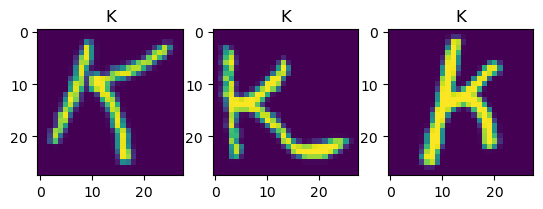

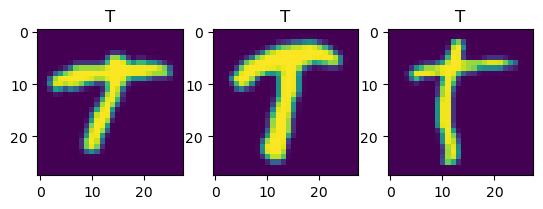

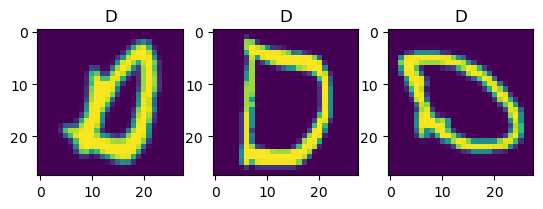

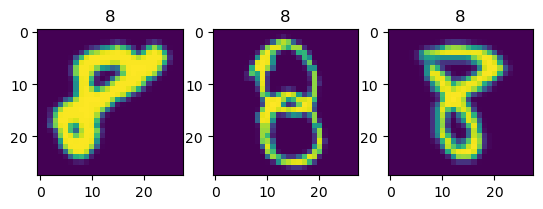

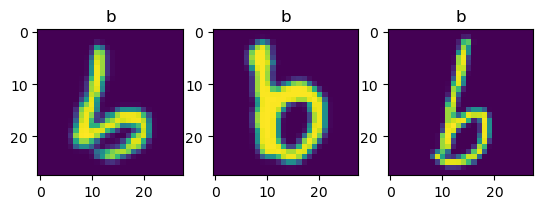

In [17]:
# your code here

N_labels = 5
random_labels = np.random.choice(np.array(list(label_dict.keys())), N_labels)

N_examples = 3

for label in random_labels:
    df_train_label = df_train.loc[df_train.iloc[:,0] == int(label)]
    ind = np.random.choice(range(df_train_label.shape[1]), N_examples)
    fig, ax = plt.subplots(1, N_examples)
    for i in range(N_examples):
        ax[i].imshow(np.transpose(np.array(df_train_label.iloc[ind[i],1:]).reshape(28, 28)))
        ax[i].set_title(chr(int(label_dict[label])))



In [19]:

images_train, labels_train = df_train.iloc[:,1:], df_train.iloc[:,0]
images_test, labels_test = df_test.iloc[:,1:], df_test.iloc[:,0]
print(f'Train: {labels_train.shape[0]} samples')
print(f'Test: {labels_test.shape[0]} samples')
print(f'Image size: {images_test.shape[1]}')

Train: 112800 samples
Test: 18800 samples
Image size: 784


### 3. Подготовьте датасет для обучения и валидации

_Подсказка: чтобы вытянуть изображения в вектор, понадобится метод_ `reshape` _из библиотеки_ `numpy`.

In [20]:
X_train = images_train
y_train = labels_train
X_test = images_test
y_test = labels_test

print('Train:', X_train.shape)
print('Test:', X_test.shape)

Train: (112800, 784)
Test: (18800, 784)


In [21]:
print('Train:', y_train.shape)
print('Test:', y_test.shape)

Train: (112800,)
Test: (18800,)


### 4. Выберите модель, обучите её, протестируйте и сохраните

Выведите на экран точность вашей модели. Выведите и проанализируйте матрицу ошибок. Какие два символа она чаще всего путает? На каком символе модель чаще всего ошибается?

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
classifier = LogisticRegression()

param_grid = {
    'max_iter': [100, 200,],
    'C': [0.1, 0.3, 1, 3, 10]
}

searcher = GridSearchCV(classifier, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

In [24]:
searcher.fit(X_train, y_train)

print(searcher.best_score_)

print(searcher.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
0.6847606382978723
{'C': 10, 'max_iter': 100}


C:\Users\yoxno\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
clf = searcher.best_estimator_

clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)

y_test_pred = clf.predict(X_test)

print('Train data')
print(f'Accuracy {accuracy_score(y_train, y_train_pred)}')
print(f'Conf matrix {confusion_matrix(y_train, y_train_pred)}')

print('Test data')
print(f'Accuracy {accuracy_score(y_test, y_test_pred)}')
print(f'Conf matrix {confusion_matrix(y_test, y_test_pred)}')



# your code here

C:\Users\yoxno\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train data
Accuracy 0.7145301418439717
Conf matrix [[1620    0    0 ...    4    0    6]
 [   0 1485    2 ...    4   10   22]
 [   3    2 1762 ...    6    1    1]
 ...
 [   4   12    8 ...  833   11   84]
 [   1    2    0 ...    1 1967   53]
 [   5   11    6 ...   15   68 1433]]
Test data
Accuracy 0.6878723404255319
Conf matrix [[276   0   0 ...   0   1   1]
 [  0 240   0 ...   2   2   3]
 [  0   0 291 ...   1   0   0]
 ...
 [  0   0   0 ... 111   1  14]
 [  0   0   0 ...   1 313   5]
 [  1   5   1 ...   4   8 226]]


<Axes: >

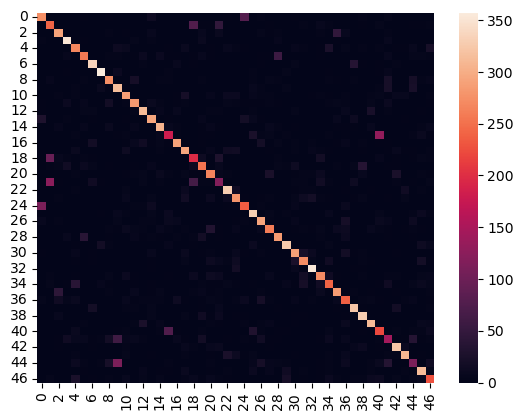

In [26]:
seaborn.heatmap(confusion_matrix(y_test, y_test_pred))

In [27]:
confusion_matrix(y_test, y_test_pred)

array([[276,   0,   0, ...,   0,   1,   1],
       [  0, 240,   0, ...,   2,   2,   3],
       [  0,   0, 291, ...,   1,   0,   0],
       ...,
       [  0,   0,   0, ..., 111,   1,  14],
       [  0,   0,   0, ...,   1, 313,   5],
       [  1,   5,   1, ...,   4,   8, 226]], dtype=int64)

In [28]:
with open(os.path.join('myapp', 'model.pkl'),'wb') as f:
    pickle.dump(clf, f)